In [120]:
import pandas as pd
import numpy as np

## 数据读入

In [121]:
data = pd.read_csv('data.csv', encoding='ansi')
print(f"data:{data.shape}")
data.head()

data:(4754, 90)


,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [122]:
data['status'].value_counts()

0    3561
1    1193
Name: status, dtype: int64

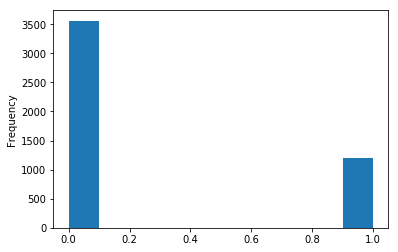

In [123]:
data['status'].astype(int).plot.hist()

## 数据信息

In [124]:
print(data.info())
data.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

float64    70
int64      13
object      7
dtype: int64

## 删除无关变量
### 用计算机分析每一列数据，若值俩俩互不相同，则判断为无关变量，删除

In [125]:
# for i in data.columns:
#     count = data[i].count()
#     if len(list(data[i].unique())) in [1,count,count-1]:
#         data.drop(i, axis = 1, inplace=True )
# data.head()
# 删除无关信息
data = data.drop(["custid","trade_no","bank_card_no","id_name","first_transaction_time","latest_query_time","loans_latest_time","source"],axis=1)

## 数据类型转换

### 将object类型转成int

In [126]:
data.select_dtypes('object').apply(pd.Series.nunique, axis=0)

reg_preference_for_trad    5
dtype: int64

### 字符型特征

In [127]:
# reg_preference_for_trad表示城市类型，仅有两个缺失，用众数填充后分别使用编码的形式进行数据转换
# 众数填充
data['reg_preference_for_trad'] = data['reg_preference_for_trad'].fillna(data['reg_preference_for_trad'].mode()[0])
# 数字编码
data_map = data['reg_preference_for_trad'].map({'一线城市': 1, '二线城市': 2,'三线城市': 3,  '其他城市': 4, '境外':0})
#数字转码
n=set(data['reg_preference_for_trad'])
dic={}
for i,j in enumerate(n):
    dic[j]=i
data['reg_preference_for_trad'] = data['reg_preference_for_trad'].map(dic)

### 处理缺失值

In [128]:
data = data.fillna(0) # 使用 0 替换所有 NaN 的值
col = data.columns.tolist()[1:]
def missing(df, columns):
    """
    使用众数填充缺失值
    df[i].mode()[0] 获取众数第一个值
    """
    col = columns
    for i in col:
        df[i].fillna(df[i].mode()[0], inplace=True)
        df[i] = df[i].astype('float')
        
missing(data, col)

## 数据集随机切分

In [129]:
from sklearn.model_selection import train_test_split

#划分训练及和测试集
X = data.drop(['status'],axis = 1)
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2018)
print(f"data:{data.shape}, test:{X_train.shape}, train:{X_test.shape}")

data:(4754, 82), test:(3327, 81), train:(1427, 81)


## 数据归一化

In [130]:
from sklearn.preprocessing import minmax_scale
# 归一化，缩放到 0-1
X_train = minmax_scale(X_train)
X_test =  minmax_scale(X_test)

## 模型训练与评分

In [131]:
#模型训练和评分
from sklearn import svm
clf_svm = svm.SVC(random_state  = 2018)
clf_svm.fit(X_train,y_train)
print(clf_svm.score(X_test,y_test))

from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(random_state  = 2018)
clf_tree.fit(X_train,y_train)
print(clf_tree.score(X_test,y_test))

from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=2018)
clf_lr.fit(X_train,y_train) 
print(clf_lr.score(X_test,y_test))

0.7498248072880168
0.6173791170287316
0.782761037140855
